3 Exploratory Data Analysis

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Imports](#3.2_Imports)
  * [3.3 Load The Data](#3.3_Load_The_Data)
  * [3.4 Explore The Data](#3.4_Explore_The_Data)
    * [3.4.1 Summary Statistics](#3.4.1_Summary_Statistics)
    * [3.4.2 Income Ranges of All Applicants](#3.4.2_Income_Ranges_of_All_Applicants)
    * [3.4.3 Income Ranges of Applicants With Payment Issues By Gender](#3.4.3_Income_Ranges_of_Applicants_With_Payment_Issues_By_Gender)
    * [3.4.4 Income Ranges of Applicants Without Payment Issues By Gender](#3.4.4_Income_Ranges_of_Applicants_Without_Payment_Issues_By_Gender)
    * [3.4.5 Income Ranges of Applicants Without Payment Issues By Loan Type](#3.4.5_Income_Ranges_of_Applicants_Without_Payment_Issues_By_Loan_Type)
    * [3.4.6 Age Groups Of All Applicants](#3.4.6_Age_Groups_Of_All_Applicants)
    * [3.4.7 Education Types Of All Applicants](#3.4.7_Education_Types_Of_All_Applicants)
    * [3.4.8 Family Status and Region Rating of All Applicants](#3.4.8_Family_Status_and_Region_Rating_of_All_Applicants)
    * [3.4.9 Income Totals and Credit Amounts Of All Applicants](#3.4.9_Income_Totals_and_Credit_Amounts_Of_All_Applicants)
  * [3.5 Correlation of Features With Payment Issues ](#3.5_Correlation_of_Features_With_Payment_Issues)
  * [3.6 Frequentist Inference](#3.6_Frequentist_Inference)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Imports<a id='3.2_Imports'></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pd.set_option('display.max_columns', 100)
from scipy import misc
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import numpy
import pandas as pd
from numpy.random import seed
import matplotlib as mpl
import statistics

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\Capstone 2021')
os.getcwd()

'C:\\Users\\daenj\\OneDrive\\Desktop\\Datasets\\Capstone 2021'

## 3.3 Loading the Data<a id='3.3_Loading_the_Data'></a>

In [3]:
#Importing data sets
nopay_data = pd.read_csv("nopaymentissues_data.csv")
nopay_data = nopay_data.drop(columns = "Unnamed: 0")

In [4]:
payissu_data = pd.read_csv("paymentissues_data.csv")
payissu_data = payissu_data.drop(columns = "Unnamed: 0")

In [5]:
clean_data = pd.read_csv("cleaned_data.csv")
clean_data = clean_data.drop(columns = "Unnamed: 0")
clean_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH_BINS,INCOME_VAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1134.0,Young,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,828.0,Middle_Age,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,815.0,Middle_Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,617.0,Middle_Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,1106.0,Middle_Age,Low


## 3.4 Explore the Data<a id='3.4_Explore_the_Data'></a>

Here are the income types of the applicants. 

In [6]:
payissu_data['NAME_INCOME_TYPE'].value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [7]:
nopay_data['NAME_INCOME_TYPE'].value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

The income types for both categories of borrowers look similar in terms of number of entries in each category. The borrowers with no payment issues include a handful of entries in the "Businessman" and "Student" categories. 

## 3.4.1 Do Borrowers With Payment Issues...?<a id='3.4.1_What_Are_The_Goods_Worth?'></a>

The price of the goods is a good something to...

## 3.4.1 Summary Statistics and Distribution of Float Variables<a id='3.4.1_Summary_Statistics_and_Distribution_of_Float_Variables'></a>

Descriptive Statistics for 'float' variables

In [8]:
clean_data.select_dtypes('float').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000
min,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,0.000290,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
max,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,0.072508,3.652430e+05,2.467200e+04,7.197000e+03,20.000000,4292.000000
mad,6.622635e+04,3.165837e+05,1.097507e+04,2.883787e+05,0.010291,1.071492e+05,2.915440e+03,1.316243e+03,0.665866,696.274722
mean,1.687979e+05,5.990260e+05,2.710849e+04,5.383163e+05,0.020868,6.772474e+04,4.986120e+03,2.994202e+03,2.152665,962.858788
median,1.471500e+05,5.135310e+05,2.490300e+04,4.500000e+05,0.018850,2.219000e+03,4.504000e+03,3.254000e+03,2.000000,757.000000
quantile,1.471500e+05,5.135310e+05,2.490300e+04,4.500000e+05,0.018850,2.219000e+03,4.504000e+03,3.254000e+03,2.000000,757.000000
kurt,1.917866e+05,1.934041e+00,7.707756e+00,2.437440e+00,3.260065,7.715474e-01,-3.213466e-01,-1.106808e+00,2.802015,-0.308571
skew,3.915597e+02,1.234778e+00,1.579824e+00,1.350143e+00,1.488009,1.664338e+00,5.908716e-01,-3.493275e-01,0.987546,0.713607
var,5.622739e+10,1.619988e+11,2.100604e+08,1.363744e+11,0.000191,1.944456e+10,1.241073e+07,2.278441e+06,0.829336,683610.051185


Text(0.5, 1.0, 'Distributions of Float Variables for Borrowers With Payment Issues')

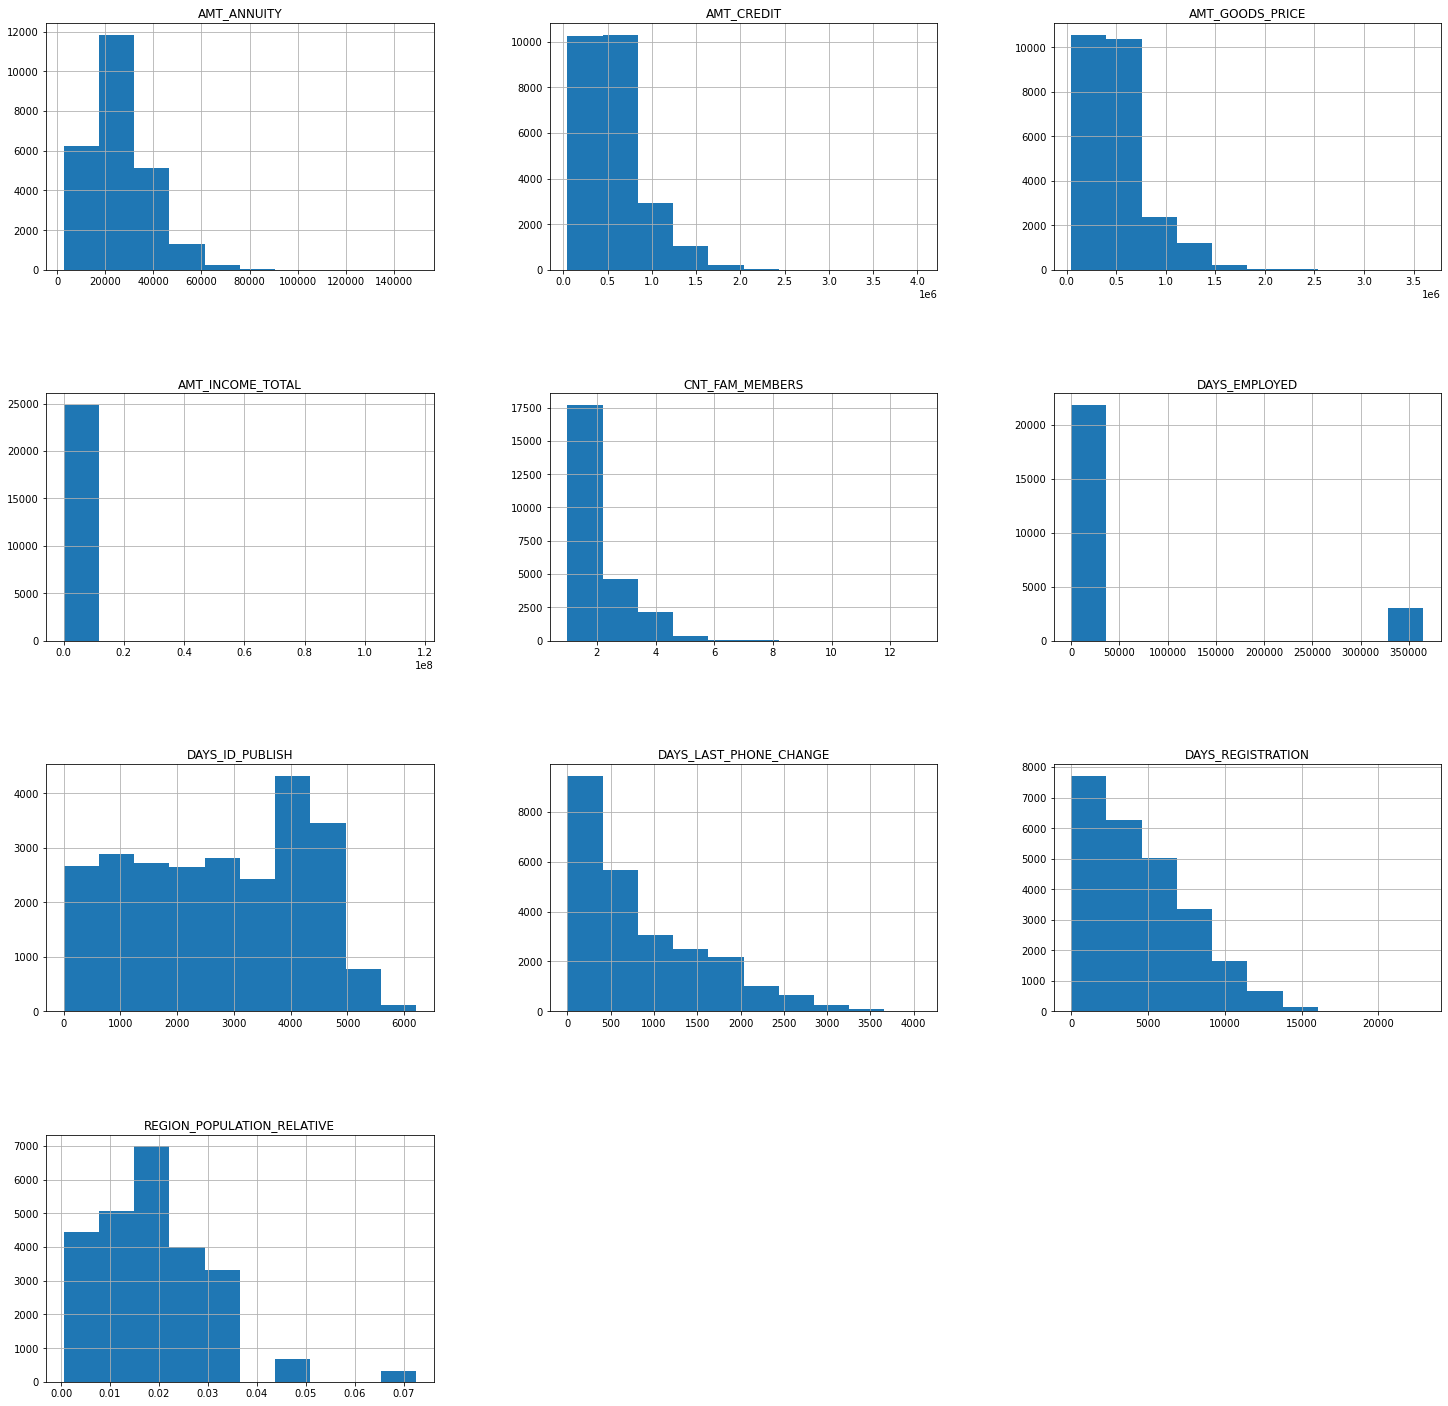

In [9]:
payissu_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);
plt.title('Distributions of Float Variables for Borrowers With Payment Issues')

This is the distribution of float variables for borrowers with payment issues. The distributions of the credit amounts and the price of the goods are similar. Interestingly, the distribution of the REGION_POPULATION_RELATIVE is skewed to the right. This indicates that borrowers with payment issues tend to live in more rural parts. The higher the number, the more populated the region is that that borrower calls home. Is this the same case with borrowers without payment issues?

Text(0.5, 1.0, 'Distributions of Float Variables for Borrowers Without Payment Issues')

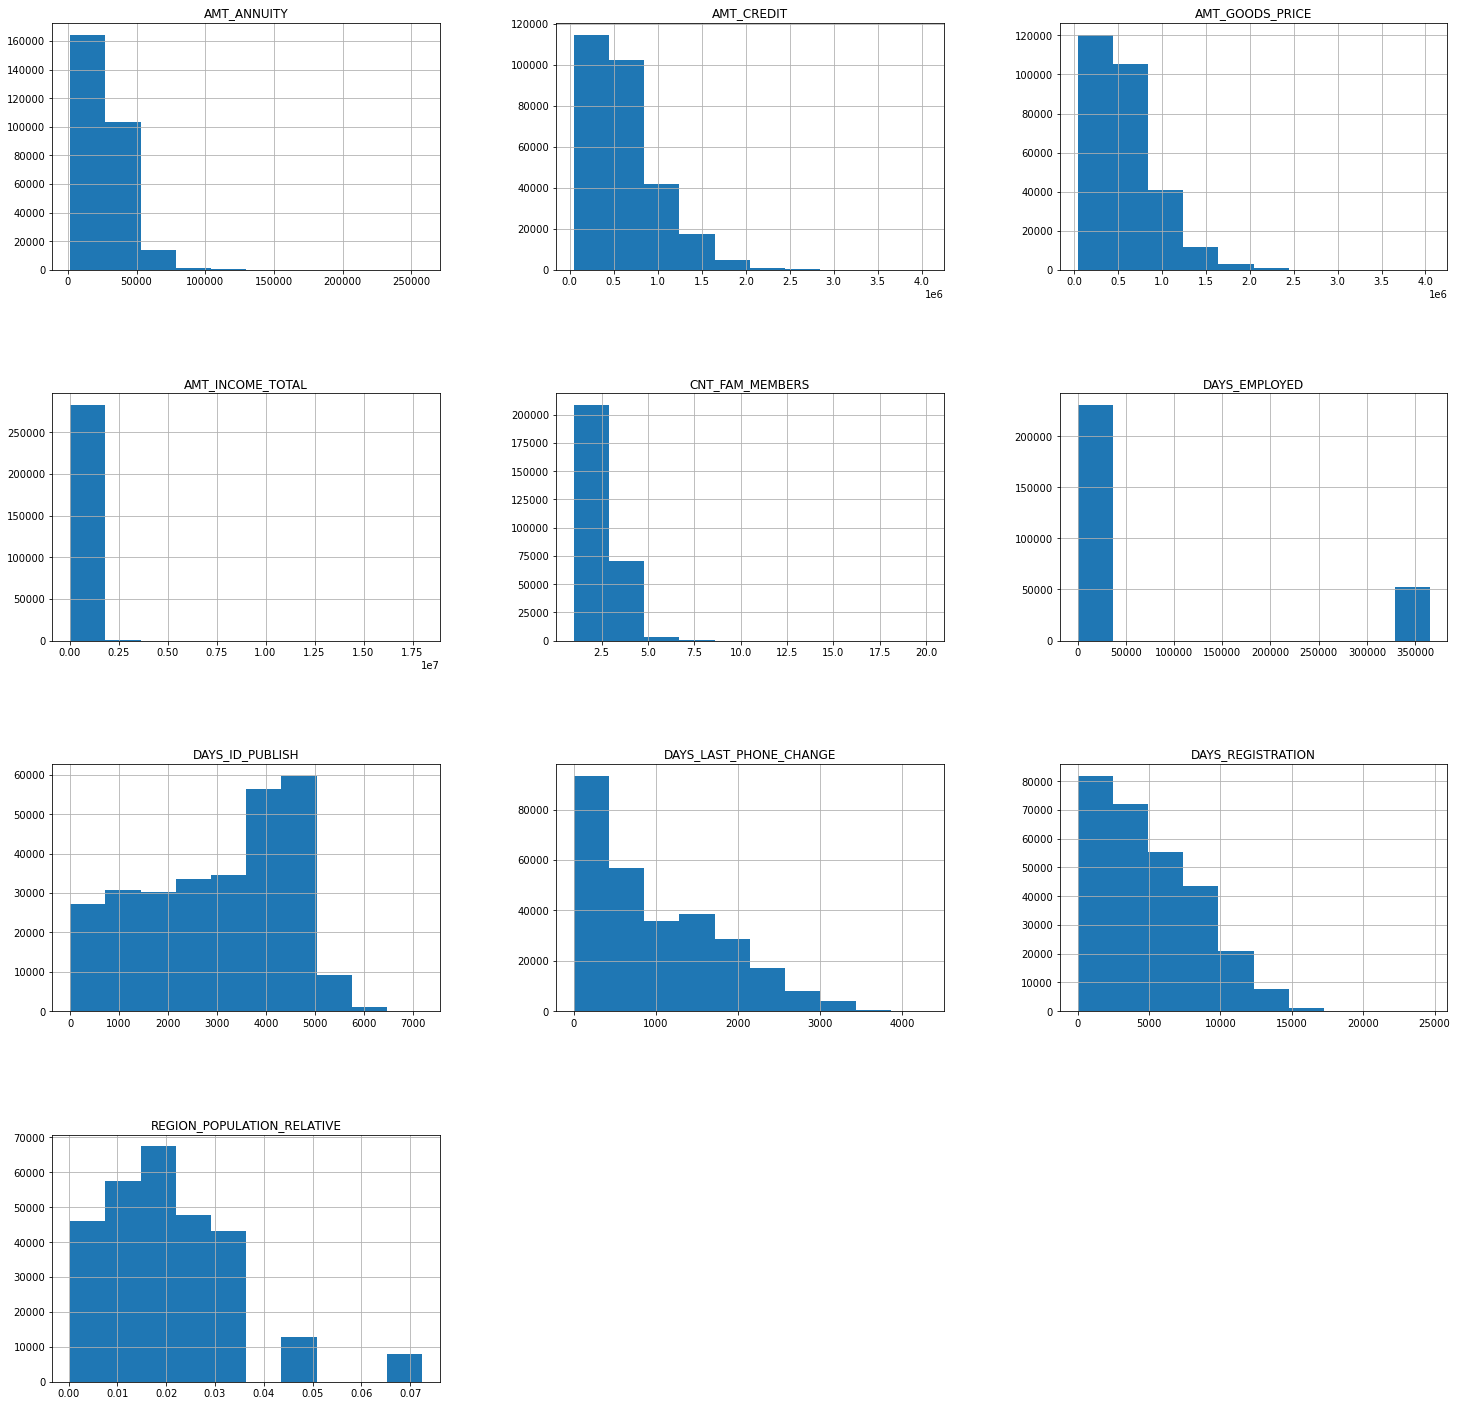

In [10]:
nopay_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);
plt.title('Distributions of Float Variables for Borrowers Without Payment Issues')

Most applicants with no payment issues are taking out less than a million dollars of credit. Again, the distributions of credit amount and good price are similar. The REGION_POPULATION_RELATIVE distribution looks similar in both datasets. It appears that most of the borrowers live in rural areas. Let's explore distributions of other variables.

## 3.4.2 Income Ranges of All Applicants<a id='3.4.2_Income_Ranges_of_All_Applicants'></a>

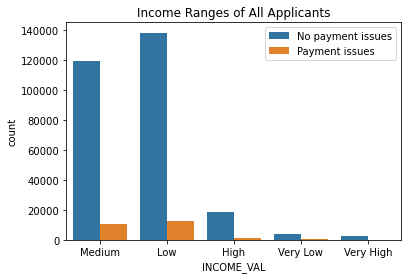

In [11]:
ax_1 = sns.countplot(x='INCOME_VAL', hue='TARGET', data= clean_data)
plt.title('Income Ranges of All Applicants')
ax_1.legend(['No payment issues','Payment issues'])

We can see in this barplot that most borrowers fall into the Medium and Low income ranges. This paints a picture as to who is seeking out loans. It makes sense that those on the extremes of the income spectrum would either be unable to secure a loan or not need to secure a loan at all. What gender are these borrowers?

## 3.4.3 Income Ranges of Applicants With Payment Issues By Gender<a id='3.4.3_Income_Ranges_of_Applicants_With_Payment_Issues_By_Gender'></a>

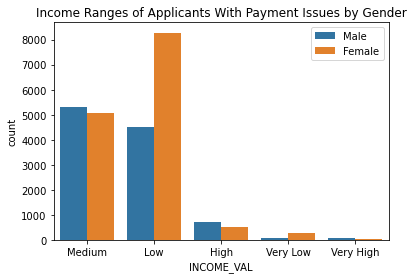

In [12]:
ax_3 = sns.countplot(x='INCOME_VAL', hue='CODE_GENDER', data= payissu_data)
plt.title('Income Ranges of Applicants With Payment Issues by Gender')
plt.legend(['Male','Female'])

Women in the low income range make up about 8000 instances of struggling to make payments. Men and women in the medium income range are about tied with about 5000 instances. What about borrowers without payment issues?

## 3.4.4 Income Ranges of Applicants Without Payment Issues By Gender<a id='3.4.4_Income_Ranges_of_Applicants_Without_Payment_Issues_By_Gender'></a>

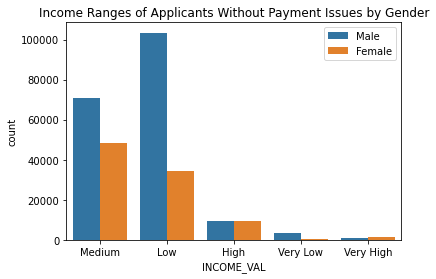

In [13]:
ax_4 = sns.countplot(x='INCOME_VAL', hue='CODE_GENDER', data= nopay_data)
plt.title('Income Ranges of Applicants Without Payment Issues by Gender')
plt.legend(['Male','Female'])

Men make up the most instances of consistent payment. Men and women in the high income range account for about 20000 instances of no payment issues. Now that we have an idea of the income ranges and gender of the borrowers, let's look at their ages.

## 3.4.5 Income Ranges of All Applicants By Loan Type<a id='3.4.4_Income_Ranges_of_All_Applicants_By_Loan_Type'></a>

Text(0.5, 1.0, 'Income Ranges of Applicants With Payment Issues by Loan Type')

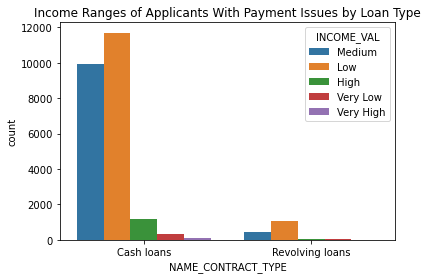

In [14]:
ax_6 = sns.countplot(x='NAME_CONTRACT_TYPE', hue='INCOME_VAL', data= payissu_data)
plt.title('Income Ranges of Applicants With Payment Issues by Loan Type')

Text(0.5, 1.0, 'Income Ranges of Applicants With Payment Issues by Loan Type')

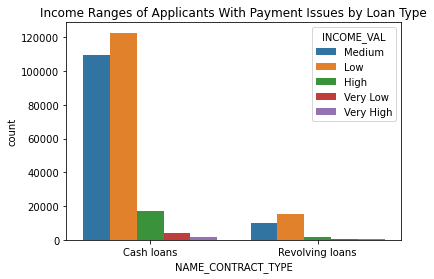

In [15]:
ax_7 = sns.countplot(x='NAME_CONTRACT_TYPE', hue='INCOME_VAL', data= nopay_data)
plt.title('Income Ranges of Applicants With Payment Issues by Loan Type')

Cash loans make up the bulk of what borrowers are receiving from financial institutions.

## 3.4.6 Age Groups of All Applicants<a id='3.4.6_Age_Groups_of_All_Applicants'></a>

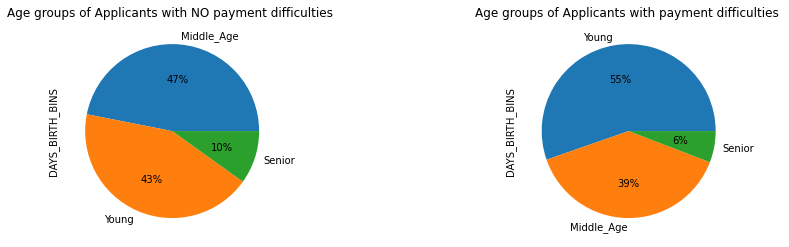

In [16]:
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
nopay_data.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
payissu_data.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()

10% of borrowers without payment difficulties are senior citizens! It is not stated what the loans are for. Young and middle aged people often use loans higher education, mortgages, car payments, etc. This could also be the case with small percentage of senior citizens. One thing to note is that younger people make up 55% of the borrowers with payment difficulties.

## 3.4.7 Education Types of All Applicants<a id='3.4.7_Education_Types_of_All_Applicants'></a>

Let's look at the education types of borrowers with and without payment issues. As observed in the wrangling, applicants without payment issues are about 9% of the total applicants in this dataset. What's interesting is that at first glance, these bargraphs look identical. We can infer that those with secondary education make up most of the pool of applicants.

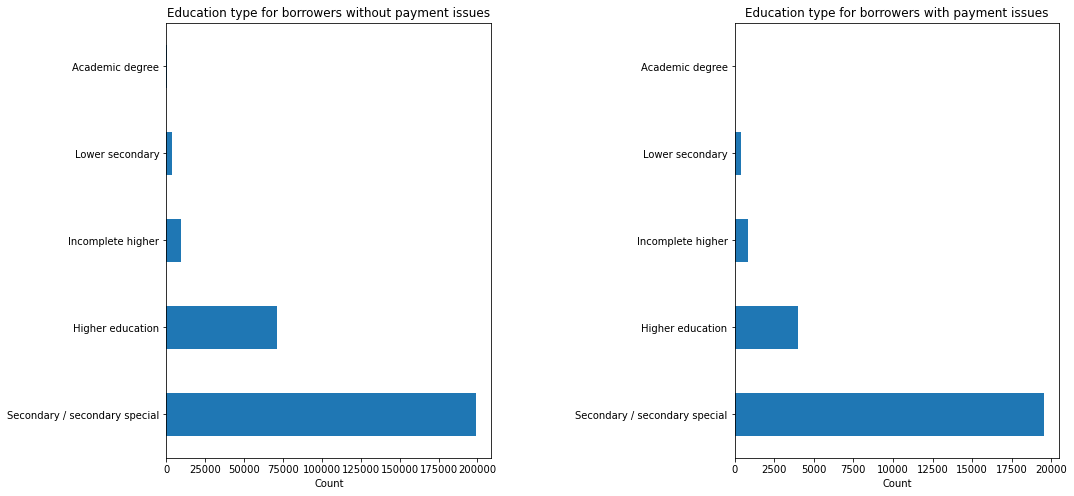

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

nopay_data.NAME_EDUCATION_TYPE.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Education type for borrowers without payment issues')
ax[0].set_xlabel('Count')

payissu_data.NAME_EDUCATION_TYPE.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Education type for borrowers with payment issues')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.75);

The trend between both bar graphs below is that those whose incomes are very low, high, or very high make up a small percentage of people borrowing money.
The low income range has the highest count in both applicants with NO payment difficulties and with payment difficulties. Medium range applicants are close behind in both cases.

## 3.4.8 Family Status and Region Rating of All Applicants<a id='3.4.8_Family_Status_and_Region_Rating_of_All_Applicants'></a>

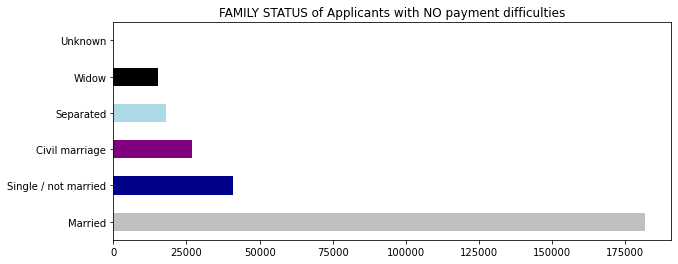

In [18]:
plt.figure(figsize=[10,4])
nopay_data.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with NO payment difficulties')
plt.show()

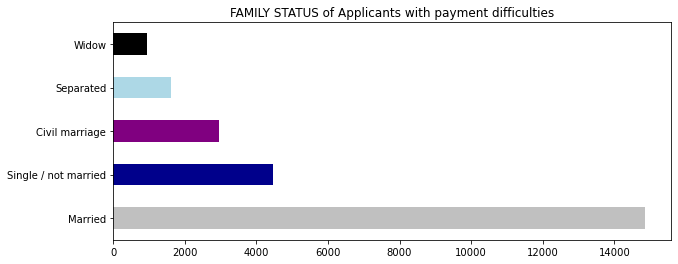

In [19]:
#Family status of potential borrowers with payment issues
plt.figure(figsize=[10,4])
payissu_data.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with payment difficulties')
plt.show()

Married couples account for most of the applicants in the entire dataset.  

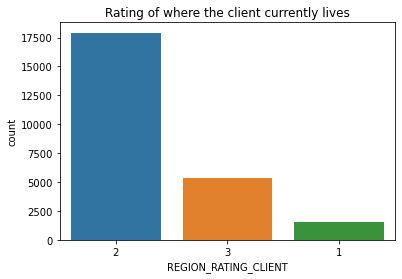

In [20]:
sns.countplot(data=payissu_data,x = 'REGION_RATING_CLIENT',order = payissu_data['REGION_RATING_CLIENT'].value_counts().index)
plt.title('Rating of where the client currently lives')
plt.show()

Lets look at the region ratings. Based on what we've seen so far, it can be inferred that regions rated as 1 are affluent. They have no reason to seek out loans. Our painting of these borrowers is coming together. Most borrowers are in the low to medium income range, are either young or middle aged, have completed secondary education, are married, and live in a middle-class region.     

## 3.4.9 Income Totals and Credit Amounts of All Applicants<a id='3.4.9_Income_Totals_and_Credit_Amounts_of_All_Applicants'></a>

High income does not equate to higher credit amounts. The credit amounts are tied to the price of the good the credit is to be used for. As stated earlier, most potential borrowers live a middle or lower class life. It should be noted that the right skewed cluster of dots points to borrowers with lower incomes being accepted for bigger credit amounts. These borrowers are doing a good job making their payments!

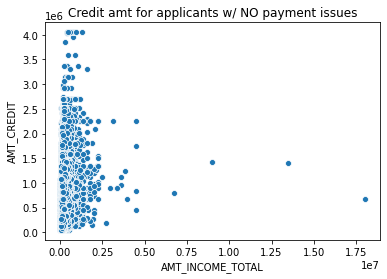

In [21]:
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=nopay_data)
plt.title('Credit amt for applicants w/ NO payment issues')
plt.show()

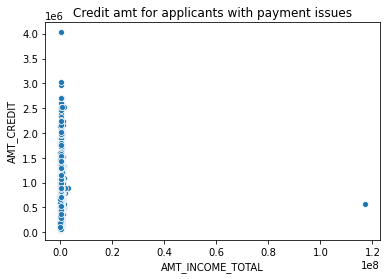

In [22]:
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=payissu_data)
plt.title('Credit amt for applicants with payment issues')
plt.show()

In the case of those with payment issues, most are lower class earners. There is one high income outlier that had payment issues.

### 3.5 Correlation of Features With Payment Issues<a id='3.5_Correlation_of_Features_With_Payment_Issues'></a>

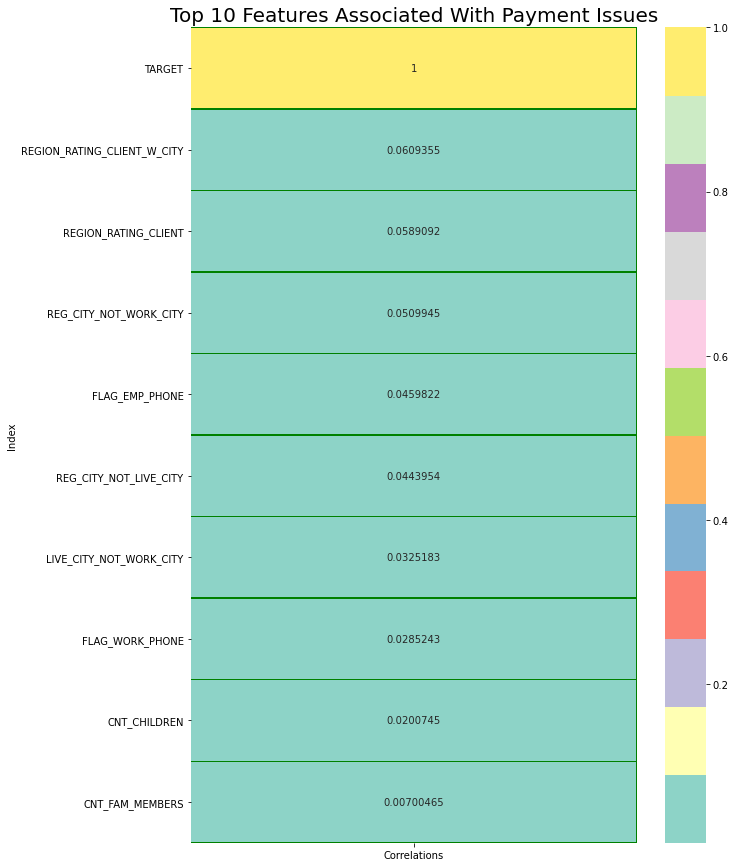

In [23]:
issue_corr = clean_data['TARGET'] == 1
corr = clean_data.corrwith(issue_corr,method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Top 10 Features Associated With Payment Issues", fontsize=20)
plt.show()

The top 3 features correlated with payment issues are the region rating with and without taking the home city into account, and whether the borrowers permanent address matches their work address or not. Providing a work phone was the 4th largest correlation with payment issues. The third feature is a bit confusing, it appears that discrepancies with the client's work address and their zip code are factors in payment issues.

### 3.6 Frequentist Inference<a id='3.6_Frequentist_Inference'></a>

Let's circle back to the income types of borrowers and hypothesize! Let's take a look at borrowers who are working to see if we can infer anything about borrowers who work and whether they have payment issues or not. For this exercise, we'll only look at borrowers that listed their income type as 'working' and ignore the rest. We will compare the top correlated feature (the rating of the region and city the client lives in) with a borrower's employment situation. We'll start with the null hypothesis.

Null: There is no significance between employment, the region a borrower lives in, and payment issues.

Alt: The relationship between employment, region rating, and payment issues is significant.

We'll start by splitting the clean data between borrowers that are 'Working' and not. Next we'll split those 'Working' between payment issues and no payment issues. The last step determines significance between work, living situation, and payment issues.

In [24]:
working_borr = clean_data[clean_data['NAME_INCOME_TYPE'] == 'Working']
borrowers = clean_data[clean_data['NAME_INCOME_TYPE'] != 'Working']

In [25]:
work_wissues = working_borr[working_borr['TARGET'] == 1]
not_working_wissues = borrowers[borrowers['TARGET'] == 0]

In [26]:
work_wissues = work_wissues['REGION_RATING_CLIENT_W_CITY']
not_working_wissues = not_working_wissues['REGION_RATING_CLIENT_W_CITY']

In [27]:
len(work_wissues)

15224

In [28]:
len(not_working_wissues)

139136

In [29]:
t_testind = stats.ttest_ind(work_wissues, not_working_wissues)
t_testind

Ttest_indResult(statistic=42.243840533593996, pvalue=0.0)

Our low p-value provides statistical evidence to reject the null hypothesis and accept the alt hypothesis! There is a significance between the region rating of working borrowers and the likelihood of payment issues. 

### 3.7 Summary<a id='3.6_Summary'></a>

What have we learned from exploring this data set? We learned what these borrowers look like socio-economically. Most borrowers are range from lower to middle income and have secondary education. These borrowers are more likely to be married or be in a relationship at the time of securing the loan. Cash loans are the most popular loan type, favored by the lower and middle class earners. Younger borrowers with payment issues accounted for a little over half of borrowers with payment issues. Most loans are given to middle-aged or younger people. The correlations with payment issues brought interesting things to light. The top 3 correlations involved region ratings of the applicants. A borrowers 